## Observations and Insights 

# Observations:

1 There were a total of 9 Regimens and 1 Placebo for hypothesis testing
2 28 more males mice were used in the experiment
3 Capomulin had the most test count with a total of 230
4 Propriva had the least test count with a total of 156
5 Ceftamin had the most data in Timepoints
6 Capomulin had the least data in Timepoints
7 Ramicane was found to be an outlier
8 Subject 185 had a decrease of Tumor Volume as Timepoints increased

In [473]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata)
study_results_df = pd.read_csv(study_results)


In [474]:
# Review Mouse Metadata to confirm dataframe

print(mouse_metadata_df)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]


In [475]:
# Review Study Results to confirm dataframe

print(study_results_df)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0           45.000000                 0
4        c819          0           45.000000                 0
...       ...        ...                 ...               ...
1888     r944         45           41.581521                 2
1889     u364         45           31.023923                 3
1890     p438         45           61.433892                 1
1891     x773         45           58.634971                 4
1892     b879         45           72.555239                 2

[1893 rows x 4 columns]


In [476]:
# Combine the data into a single dataset

combined_data_df = pd.merge(mouse_metadata_df,study_results_df, on="Mouse ID")
print(combined_data_df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [477]:
# Deleting Duplicates on Mouse ID and Timepoint

combined_data_df = combined_data_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
print(combined_data_df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [478]:
# Display the data table for preview

print(combined_data_df.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [479]:
# Checking the number of mice.

print(combined_data_df["Mouse ID"].value_counts())

m601    10
c282    10
j755    10
a963    10
j913    10
        ..
x226     1
l872     1
o848     1
h428     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64


In [480]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

combined_data_df_clean = combined_data_df.drop_duplicates(subset = ["Mouse ID"])
print(combined_data_df_clean)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane    Male          21          16          0   
10       s185    Capomulin  Female           3          17          0   
20       x401    Capomulin  Female          16          15          0   
30       m601    Capomulin    Male          22          17          0   
40       g791     Ramicane    Male          11          16          0   
...       ...          ...     ...         ...         ...        ...   
1858     z314     Stelasyn  Female          21          28          0   
1860     z435     Propriva  Female          12          26          0   
1863     z581    Infubinol  Female          24          25          0   
1873     z795     Naftisol  Female          13          29          0   
1883     z969     Naftisol    Male           9          30          0   

      Tumor Volume (mm3)  Metastatic Sites  
0                   45.0                 0  
10                  45.0         

In [481]:
# Checking the number of mice in the clean DataFrame.

print(combined_data_df_clean["Mouse ID"].value_counts())

t573    1
a457    1
v923    1
d251    1
q610    1
       ..
a818    1
r850    1
s565    1
l661    1
b447    1
Name: Mouse ID, Length: 249, dtype: int64


## Summary Statistics

In [482]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_volume = combined_data_df["Tumor Volume (mm3)"] 

# Total Mean
mean_tv = np.mean(tumor_volume)
print(f"The mean Tumor Volume is {mean_tv}")

The mean Tumor Volume is 50.449276454131365


In [483]:
# Total Median 

median_tv = np.median(tumor_volume)
print(f"The median Tumor Volume is {median_tv}")

The median Tumor Volume is 48.951421075


In [484]:
# Total Variance

var_tv = np.var(tumor_volume, ddof=0)
print(f"The variance is {var_tv}")

The variance is 79.24927995522994


In [485]:
# Total Standard Deviation

sd_tv = np.std(tumor_volume, ddof=0)
print(f"The Standard Deviation is {sd_tv}")

The Standard Deviation is 8.902206465547176


In [486]:
# Total SEM

print(combined_data_df.sem(axis = 1))


0        8.298193
1        6.792957
2        5.682101
3        5.351059
4        5.151372
          ...    
1888    10.634034
1889    11.011380
1890    11.565430
1891    11.916572
1892    12.724423
Length: 1888, dtype: float64


In [487]:
# Total Statistical DataFrame

total_stat_dataframe = pd.DataFrame({"Total Mean": [50.45], "Total Median": [48.95], "Total Variance":[79.25], "Total Standard Deviation": [8.9]})
print(total_stat_dataframe)

   Total Mean  Total Median  Total Variance  Total Standard Deviation
0       50.45         48.95           79.25                       8.9


In [488]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#Value Counts to review all regimens
print(combined_data_df["Drug Regimen"].value_counts())

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64


In [489]:
#Ramicane DataFrame

ramicane_group_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Ramicane",:]
print(ramicane_group_df.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [490]:
# Ramicane DataFrame Data
tumor_volume_r = ramicane_group_df["Tumor Volume (mm3)"] 

# Total Mean, Median, Variance, Standard Deviation, SEM
mean_tv_r = np.mean(tumor_volume_r)
median_tv_r = np.median(tumor_volume_r)
var_tv_r = np.var(tumor_volume_r, ddof=0)
sd_tv_r = np.std(tumor_volume_r, ddof=0)

print(mean_tv_r)
print(median_tv_r)
print(var_tv_r)
print(sd_tv_r)

40.2167450667105
40.67323554
23.38369209265624
4.83566873272521


In [491]:
# Ramicane SEM

print(ramicane_group_df.sem(axis = 1))

0      8.298193
1      6.792957
2      5.682101
3      5.351059
4      5.151372
         ...   
449    8.057313
450    8.405950
451    8.075117
452    7.786933
453    7.162003
Length: 228, dtype: float64


In [492]:
# Ketapril DataFrame 

ketapril_group_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Ketapril",:]
print(ketapril_group_df.head())

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
511     a457     Ketapril  Female          11          30          0   
512     a457     Ketapril  Female          11          30          5   
513     a457     Ketapril  Female          11          30         10   
690     c580     Ketapril    Male          22          25          0   
691     c580     Ketapril    Male          22          25          5   

     Tumor Volume (mm3)  Metastatic Sites  
511           45.000000                 0  
512           47.462891                 0  
513           49.783419                 0  
690           45.000000                 0  
691           46.628455                 0  


In [493]:
# Ketapril DataFrame Data
tumor_volume_k = ketapril_group_df["Tumor Volume (mm3)"] 

# Total Mean, Median, Variance, Standard Deviation, SEM
mean_tv_k = np.mean(tumor_volume_k)
median_tv_k = np.median(tumor_volume_k)
var_tv_k = np.var(tumor_volume_k, ddof=0)
sd_tv_k = np.std(tumor_volume_k, ddof=0)

print(mean_tv_k)
print(median_tv_k)
print(var_tv_k)
print(sd_tv_k)

55.23563764047869
53.698742644999996
68.18893042567763
8.257658894970028


In [494]:
print(ketapril_group_df.sem(axis = 1))

511      8.850989
512      8.808132
513      8.854178
690      8.488816
691      8.254388
          ...    
1819     8.981319
1820     9.792245
1821    10.139345
1822    10.609992
1823    11.248583
Length: 188, dtype: float64


In [495]:
#Placebo DataFrame

placebo_group_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Placebo",:]
print(placebo_group_df.head())

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
474     a262      Placebo  Female          17          29          0   
475     a262      Placebo  Female          17          29          5   
476     a262      Placebo  Female          17          29         10   
477     a262      Placebo  Female          17          29         15   
478     a262      Placebo  Female          17          29         20   

     Tumor Volume (mm3)  Metastatic Sites  
474           45.000000                 0  
475           48.717568                 1  
476           49.595181                 1  
477           53.827974                 2  
478           57.013313                 2  


In [496]:
# Placebo DataFrame Data
tumor_volume_p = placebo_group_df["Tumor Volume (mm3)"] 

# Total Mean, Median, Variance, Standard Deviation, SEM
mean_tv_k = np.mean(tumor_volume_p)
median_tv_k = np.median(tumor_volume_p)
var_tv_k = np.var(tumor_volume_p, ddof=0)
sd_tv_k = np.std(tumor_volume_p, ddof=0)

print(mean_tv_k)
print(median_tv_k)
print(var_tv_k)
print(sd_tv_k)

54.03358078635358
52.28893409
60.830137727102
7.799367777397217


In [497]:

print(placebo_group_df.sem(axis = 1))

474      8.656789
475      8.661974
476      8.420735
477      8.736978
478      9.107283
          ...    
1829    10.254035
1830    10.625053
1831    11.226239
1832    12.132082
1833    12.571015
Length: 181, dtype: float64


In [498]:
#Zoniferol DataFrame

zoniferol_group_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Zoniferol",:]
print(zoniferol_group_df.head())

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
501     a401    Zoniferol  Female           8          25          0   
502     a401    Zoniferol  Female           8          25          5   
503     a401    Zoniferol  Female           8          25         10   
504     a401    Zoniferol  Female           8          25         15   
505     a401    Zoniferol  Female           8          25         20   

     Tumor Volume (mm3)  Metastatic Sites  
501           45.000000                 0  
502           46.111986                 0  
503           47.725937                 1  
504           49.934725                 1  
505           52.204511                 2  


In [499]:
# Zoniferol DataFrame Data
tumor_volume_z = zoniferol_group_df["Tumor Volume (mm3)"] 

# Total Mean, Median, Variance, Standard Deviation, SEM
mean_tv_z = np.mean(tumor_volume_z)
median_tv_z = np.median(tumor_volume_z)
var_tv_z = np.var(tumor_volume_z, ddof=0)
sd_tv_z = np.std(tumor_volume_z, ddof=0)

print(mean_tv_z)
print(median_tv_z)
print(var_tv_z)
print(sd_tv_z)

53.236506551593415
51.818479325
48.266688601532294
6.947423162693654


In [500]:

print(zoniferol_group_df.sem(axis = 1))

501      8.652167
502      8.442008
503      8.321765
504      8.517220
505      8.717080
          ...    
1719    11.417139
1774     9.259590
1775     9.074559
1776     8.928984
1777     8.975910
Length: 182, dtype: float64


In [501]:
#Ceftamin DataFrame

ceftamin_group_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Ceftamin",:]
print(ceftamin_group_df.head())

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
484     a275     Ceftamin  Female          20          28          0   
485     a275     Ceftamin  Female          20          28          5   
486     a275     Ceftamin  Female          20          28         10   
487     a275     Ceftamin  Female          20          28         15   
488     a275     Ceftamin  Female          20          28         20   

     Tumor Volume (mm3)  Metastatic Sites  
484           45.000000                 0  
485           46.795257                 0  
486           47.371343                 0  
487           49.734404                 0  
488           50.513437                 1  


In [502]:
# Ceftamin DataFrame Data
tumor_volume_c = ceftamin_group_df["Tumor Volume (mm3)"] 

# Total Mean, Median, Variance, Standard Deviation, SEM
mean_tv_c = np.mean(tumor_volume_c)
median_tv_c = np.median(tumor_volume_c)
var_tv_c = np.var(tumor_volume_c, ddof=0)
sd_tv_c = np.std(tumor_volume_c, ddof=0)

print(mean_tv_c)
print(median_tv_c)
print(var_tv_c)
print(sd_tv_c)

52.59117180960677
51.77615728000001
39.06944594028265
6.250555650522812


In [503]:

print(ceftamin_group_df.sem(axis = 1))

484      8.600000
485      8.387423
486      8.085234
487      8.187496
488      7.999734
          ...    
1851     8.819794
1852     9.002363
1853     9.457367
1854    10.020548
1855    10.482470
Length: 178, dtype: float64


In [504]:
#Infubinol DataFrame

infubinol_group_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Infubinol",:]
print(infubinol_group_df.head())

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
454     a203    Infubinol  Female          20          23          0   
455     a203    Infubinol  Female          20          23          5   
456     a203    Infubinol  Female          20          23         10   
457     a203    Infubinol  Female          20          23         15   
458     a203    Infubinol  Female          20          23         20   

     Tumor Volume (mm3)  Metastatic Sites  
454           45.000000                 0  
455           48.508468                 0  
456           51.852437                 1  
457           52.777870                 1  
458           55.173336                 1  


In [505]:
# Infubinol DataFrame Data
tumor_volume_i = infubinol_group_df["Tumor Volume (mm3)"] 

# Total Mean, Median, Variance, Standard Deviation, SEM
mean_tv_i = np.mean(tumor_volume_i)
median_tv_i = np.median(tumor_volume_i)
var_tv_i = np.var(tumor_volume_i, ddof=0)
sd_tv_i = np.std(tumor_volume_i, ddof=0)

print(mean_tv_i)
print(median_tv_i)
print(var_tv_i)
print(sd_tv_i)

52.88479510859551
51.82058438
42.88638815058418
6.54876997233711


In [506]:

print(infubinol_group_df.sem(axis = 1))

454      8.382124
455      8.497925
456      8.595719
457      8.490127
458      8.756827
          ...    
1868     8.318049
1869     8.670836
1870     9.029848
1871     9.466741
1872    10.170605
Length: 178, dtype: float64


In [507]:
#Propriva DataFrame

propriva_group_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Propriva",:]
print(propriva_group_df.head())

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
541     a699     Propriva  Female           5          28          0   
542     a699     Propriva  Female           5          28          5   
543     a699     Propriva  Female           5          28         10   
544     a699     Propriva  Female           5          28         15   
545     a699     Propriva  Female           5          28         20   

     Tumor Volume (mm3)  Metastatic Sites  
541           45.000000                 0  
542           46.553090                 0  
543           47.867376                 0  
544           49.530401                 0  
545           50.712423                 0  


In [508]:
# Propriva DataFrame Data
tumor_volume_pr = propriva_group_df["Tumor Volume (mm3)"] 

# Total Mean, Median, Variance, Standard Deviation, SEM
mean_tv_pr = np.mean(tumor_volume_pr)
median_tv_pr = np.median(tumor_volume_pr)
var_tv_pr = np.var(tumor_volume_pr, ddof=0)
sd_tv_pr = np.std(tumor_volume_pr, ddof=0)

print(mean_tv_p)
print(median_tv_p)
print(var_tv_p)
print(sd_tv_p)

45.0
45.0
0.0
0.0


In [509]:

print(propriva_group_df.sem(axis = 1))

541     8.992219
542     8.863817
543     8.800312
544     8.901755
545     9.026341
          ...   
1741    8.834023
1742    8.893249
1860    8.565045
1861    8.487454
1862    8.432491
Length: 156, dtype: float64


In [510]:
#Capomulin DataFrame

capomulin_group_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Capomulin",:]
print(capomulin_group_df.head(50))

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10      s185    Capomulin  Female           3          17          0   
11      s185    Capomulin  Female           3          17          5   
12      s185    Capomulin  Female           3          17         10   
13      s185    Capomulin  Female           3          17         15   
14      s185    Capomulin  Female           3          17         20   
15      s185    Capomulin  Female           3          17         25   
16      s185    Capomulin  Female           3          17         30   
17      s185    Capomulin  Female           3          17         35   
18      s185    Capomulin  Female           3          17         40   
19      s185    Capomulin  Female           3          17         45   
20      x401    Capomulin  Female          16          15          0   
21      x401    Capomulin  Female          16          15          5   
22      x401    Capomulin  Female          16          15       

In [511]:
# Capomulin DataFrame Data
tumor_volume_ca = capomulin_group_df["Tumor Volume (mm3)"] 

# Total Mean, Median, Variance, Standard Deviation, SEM
mean_tv_ca = np.mean(tumor_volume_ca)
median_tv_ca = np.median(tumor_volume_ca)
var_tv_ca = np.var(tumor_volume_ca, ddof=0)
sd_tv_ca = np.std(tumor_volume_ca, ddof=0)

print(mean_tv_ca)
print(median_tv_ca)
print(var_tv_ca)
print(sd_tv_ca)

40.67574114100001
41.557808879999996
24.839295580601572
4.9839036488079875


In [512]:

print(capomulin_group_df.sem(axis = 1))

10       8.596511
11       8.060623
12       6.702716
13       6.743588
14       6.616129
          ...    
440     10.148102
1452     8.488816
1453     8.087196
1454     7.766051
1455     7.562228
Length: 230, dtype: float64


In [513]:
#Naftisol DataFrame

naftisol_group_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Naftisol",:]
print(naftisol_group_df.head())

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
558     a818     Naftisol  Female          12          28          0   
559     a818     Naftisol  Female          12          28          5   
560     a818     Naftisol  Female          12          28         10   
561     a818     Naftisol  Female          12          28         15   
562     a818     Naftisol  Female          12          28         20   

     Tumor Volume (mm3)  Metastatic Sites  
558           45.000000                 0  
559           45.696709                 0  
560           49.790919                 0  
561           51.227566                 0  
562           54.834624                 0  


In [514]:
# Naftisol DataFrame Data
tumor_volume_n = naftisol_group_df["Tumor Volume (mm3)"] 

# Total Mean, Median, Variance, Standard Deviation, SEM
mean_tv_n = np.mean(tumor_volume_n)
median_tv_n = np.median(tumor_volume_n)
var_tv_n = np.var(tumor_volume_n, ddof=0)
sd_tv_n = np.std(tumor_volume_n, ddof=0)

print(mean_tv_n)
print(median_tv_n)
print(var_tv_n)
print(sd_tv_n)

54.331564658333306
52.509284609999995
65.8177075949599
8.112811324994555


In [515]:

print(naftisol_group_df.sem(axis = 1))

558      8.683317
559      8.354671
560      8.704855
561      8.718957
562      9.212594
          ...    
1888    10.634034
1889    11.011380
1890    11.565430
1891    11.916572
1892    12.724423
Length: 186, dtype: float64


In [516]:
#Stelasyn DataFrame

stelasyn_group_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Stelasyn",:]
print(stelasyn_group_df.head())

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
494     a366     Stelasyn  Female          16          29          0   
495     a366     Stelasyn  Female          16          29          5   
496     a366     Stelasyn  Female          16          29         10   
497     a366     Stelasyn  Female          16          29         15   
498     a366     Stelasyn  Female          16          29         20   

     Tumor Volume (mm3)  Metastatic Sites  
494           45.000000                 0  
495           48.951368                 0  
496           53.523990                 0  
497           55.265582                 0  
498           57.285987                 0  


In [517]:
# Stelasyn DataFrame Data
tumor_volume_s = stelasyn_group_df["Tumor Volume (mm3)"] 

# Total Mean, Median, Variance, Standard Deviation, SEM
mean_tv_s = np.mean(tumor_volume_s)
median_tv_s = np.median(tumor_volume_s)
var_tv_s = np.var(tumor_volume_s, ddof=0)
sd_tv_s = np.std(tumor_volume_s, ddof=0)

print(mean_tv_s)
print(median_tv_s)
print(var_tv_s)
print(sd_tv_s)

54.23314911988949
52.43173664
59.122105531524184
7.6890900327362655


In [518]:

print(stelasyn_group_df.sem(axis = 1))

494      8.666026
495      8.831653
496      9.236683
497      9.271067
498      9.454924
          ...    
1761     8.555892
1762     9.016944
1763    10.059672
1858     8.610459
1859     8.254115
Length: 181, dtype: float64


In [519]:
# Assemble the resulting series into a single summary dataframe.

combined_meds_df = pd.DataFrame({"Regime Name": ["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Stelasyn","Placebo","Infubinol","Ceftamin","Propriva"], "Mean":[40.68,40.21,55.24,54.33,53.24,54.23,54.03,52.88,52.59,45], "Median":[41.56,40.67,53.70,52.50,51.81,52.43,52.28,51.82,51.78,45], "Variance":[24.84,23.38,68.19,65.81,48.26,59.12,60.83,42.89,39.07,0], "Standard Deviation":[4.98,4.84,8.25,8.11,6.94,7.69,7.80,6.55,6.25,0], "Age_Months":[.51,.39,.44,.49,.42,.60,.47,.56,.60,58], "Weight": [.18,.21,.13,.11,.11,.12,.14,.16,.12,.14], "Timepoint": [.95,.95,1.02,1.04,1.06,1.02,1.03,1,1.1,1.09], "Tumor Volume": [.33,.32,.60,.60,.52,.57,.58,.49,.47,.53], "Metastatic Sites":[.05,0.4,.10,.09,.09,.07,.10,.07,.09,.09]})
print(combined_meds_df)


  Regime Name   Mean  Median  Variance  Standard Deviation  Age_Months  \
0   Capomulin  40.68   41.56     24.84                4.98        0.51   
1    Ramicane  40.21   40.67     23.38                4.84        0.39   
2    Ketapril  55.24   53.70     68.19                8.25        0.44   
3    Naftisol  54.33   52.50     65.81                8.11        0.49   
4   Zoniferol  53.24   51.81     48.26                6.94        0.42   
5    Stelasyn  54.23   52.43     59.12                7.69        0.60   
6     Placebo  54.03   52.28     60.83                7.80        0.47   
7   Infubinol  52.88   51.82     42.89                6.55        0.56   
8    Ceftamin  52.59   51.78     39.07                6.25        0.60   
9    Propriva  45.00   45.00      0.00                0.00       58.00   

   Weight  Timepoint  Tumor Volume  Metastatic Sites  
0    0.18       0.95          0.33              0.05  
1    0.21       0.95          0.32              0.40  
2    0.13       1.02

In [520]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

print(combined_meds_df[["Regime Name", "Mean", "Median", "Variance", "Standard Deviation", "Age_Months", "Weight", "Timepoint", "Tumor Volume", "Metastatic Sites"]].describe())


            Mean     Median   Variance  Standard Deviation  Age_Months  \
count  10.000000  10.000000  10.000000           10.000000   10.000000   
mean   50.243000  49.355000  43.239000            6.141000    6.248000   
std     5.896858   4.943261  21.956722            2.473111   18.183942   
min    40.210000  40.670000   0.000000            0.000000    0.390000   
25%    46.897500  46.695000  28.397500            5.297500    0.447500   
50%    53.060000  51.815000  45.575000            6.745000    0.500000   
75%    54.180000  52.392500  60.402500            7.772500    0.590000   
max    55.240000  53.700000  68.190000            8.250000   58.000000   

          Weight  Timepoint  Tumor Volume  Metastatic Sites  
count  10.000000  10.000000     10.000000         10.000000  
mean    0.142000   1.026000      0.501000          0.115000  
std     0.032592   0.050816      0.102681          0.101352  
min     0.110000   0.950000      0.320000          0.050000  
25%     0.120000   1.00

## Bar and Pie Charts

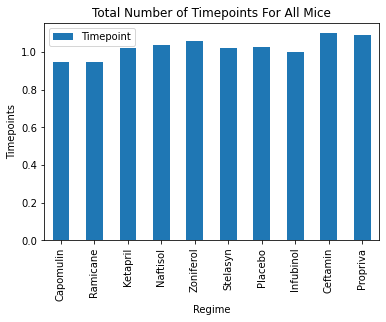

<Figure size 432x288 with 0 Axes>

In [521]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

combined_meds_df.plot(kind="bar", x="Regime Name", y="Timepoint")
plt.title("Total Number of Timepoints For All Mice")
plt.ylabel("Timepoints")
plt.xlabel("Regime")
plt.show()
plt.tight_layout()

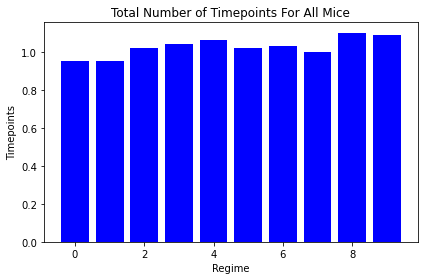

In [522]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

regimes = ["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Stelasyn","Placebo","Infubinol","Ceftamin","Propriva"]
points = [0.95,0.95,1.02,1.04,1.06,1.02,1.03,1.00,1.10,1.09]

x_axis = np.arange(0,len(regimes))

plt.bar(x_axis, points, color="b", align="center")
plt.title("Total Number of Timepoints For All Mice")
plt.ylabel("Timepoints")
plt.xlabel("Regime")
plt.show
plt.tight_layout()


In [523]:
gender_data = combined_data_df.groupby("Sex")
print(gender_data.count())

        Mouse ID  Drug Regimen  Age_months  Weight (g)  Timepoint  \
Sex                                                                 
Female       930           930         930         930        930   
Male         958           958         958         958        958   

        Tumor Volume (mm3)  Metastatic Sites  
Sex                                           
Female                 930               930  
Male                   958               958  


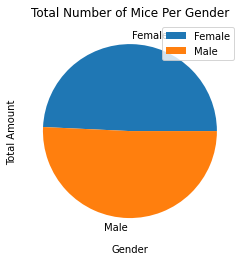

<Figure size 432x288 with 0 Axes>

In [524]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_df = pd.DataFrame({"Sex": ["Female", "Male"], "Total Amount":[930, 958]}, index=["Female","Male"])
gender_df.plot.pie(y="Total Amount")
plt.title("Total Number of Mice Per Gender")
plt.xlabel("Gender")
plt.show()
plt.tight_layout()

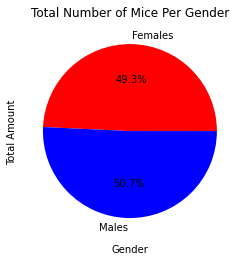

<Figure size 432x288 with 0 Axes>

In [525]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Females", "Males"]
sizes = [930, 958]
colors = ["red", "blue"]
explode = (0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Total Number of Mice Per Gender")
plt.xlabel("Gender")
plt.ylabel("Total Amount")
plt.show()
plt.tight_layout()


## Quartiles, Outliers and Boxplots

In [526]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin Total Tumor Volume

total_cap_vol = capomulin_group_df["Tumor Volume (mm3)"].sum()
print(total_cap_vol)

9355.42046243


In [527]:
# Ramicane Total Tumor Volume

total_ram_vol = ramicane_group_df["Tumor Volume (mm3)"].sum()
print(total_ram_vol)

9169.41787521


In [528]:
# Infubinol Total Tumor Volume

total_inf_vol = infubinol_group_df["Tumor Volume (mm3)"].sum()
print(total_inf_vol)

9413.49352933


In [529]:
# Ceftamin Total Tumor Volume

total_cef_vol = ceftamin_group_df["Tumor Volume (mm3)"].sum()
print(total_cef_vol)

9361.228582110001


In [530]:
# Calculate the quartiles and IQR 

#Capomulin Quartiles
cap_q = capomulin_group_df.quantile([.1, .25, .5, .75], axis = 0)
print(cap_q)

      Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0.10         3.0        17.0        0.0           33.058370               0.0
0.25         7.0        17.0       10.0           37.685933               0.0
0.50        16.5        20.5       20.0           41.557809               0.0
0.75        20.0        22.0       35.0           45.000000               1.0


In [531]:
#Capomulin IQR

print(45.000000-37.685933)

7.314067000000001


In [532]:
#Ramicane Quartiles

ram_q = ramicane_group_df.quantile([.1, .25, .5, .75], axis = 0)
print(ram_q)

      Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0.10         4.0        16.0        0.0           34.064154               0.0
0.25         7.0        17.0       10.0           36.674635               0.0
0.50         9.0        19.0       20.0           40.673236               0.0
0.75        18.0        22.0       35.0           45.000000               1.0


In [533]:
#Ramicane IQR

print(45.000000-36.674635)

8.325364999999998


In [534]:
#Infubinol Quartiles

inf_q = infubinol_group_df.quantile([.1, .25, .5, .75], axis = 0)
print(inf_q)

      Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0.10         3.0        25.0        0.0           45.000000               0.0
0.25         8.0        25.0        5.0           47.312353               0.0
0.50        20.0        27.0       15.0           51.820584               1.0
0.75        23.0        29.0       30.0           57.314444               2.0


In [535]:
#Infubinol IQR

print(57.314444-47.312353)

10.002091


In [536]:
#Ceftamin Quartiles

cef_q = ceftamin_group_df.quantile([.1, .25, .5, .75], axis = 0)
print(cef_q)

      Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0.10         3.0        25.0        0.0           45.000000               0.0
0.25         6.0        26.0        5.0           47.208427               0.0
0.50        12.0        28.0       20.0           51.776157               1.0
0.75        20.0        28.0       30.0           56.801438               2.0


In [537]:
#Ceftamin IQR

print(56.801438-47.20842)

9.593018


In [538]:
# Calculate quantitatively determine if there are any potential outliers across all four treatment regimens. 
# Capomulin Outliers

lower_bound_cap = 37.68-(1.5*7.31)
upper_bound_cap = 45.00+(1.5*7.31)
print(f"Values below {lower_bound_cap} could be outliers.")
print(f"Values above {upper_bound_cap} could be outliers.")

Values below 26.715 could be outliers.
Values above 55.965 could be outliers.


In [539]:
#Ramicane Outliers

lower_bound_ram = 36.67-(1.5*8.32)
upper_bound_ram = 45.00+(1.5*8.32)
print(f"Values below {lower_bound_ram} could be outliers.")
print(f"Values above {upper_bound_ram} could be outliers.")

Values below 24.19 could be outliers.
Values above 57.480000000000004 could be outliers.


In [540]:
#Infubino Outliers

lower_bound_inf = 47.31-(1.5*10.00)
upper_bound_inf = 57.31+(1.5*10.00)
print(f"Values below {lower_bound_inf} could be outliers.")
print(f"Values above {upper_bound_inf} could be outliers.")

Values below 32.31 could be outliers.
Values above 72.31 could be outliers.


In [541]:
#Ceftamin Outliers

lower_bound_cef = 47.20-(1.5*9.59)
upper_bound_cef = 56.80+(1.5*9.59)
print(f"Values below {lower_bound_cef} could be outliers.")
print(f"Values above {upper_bound_cef} could be outliers.")

Values below 32.815000000000005 could be outliers.
Values above 71.185 could be outliers.


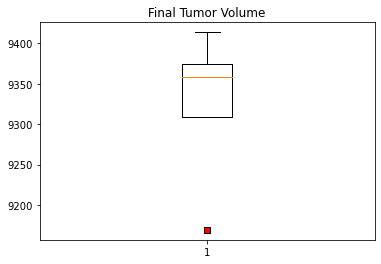

In [542]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

total_volume = [9355.42, 9169.41, 9413.49, 9361.23]

red_square = dict(markerfacecolor="r", marker="s")
fig1, axl = plt.subplots()
axl.set_title("Final Tumor Volume")
axl.boxplot(total_volume, flierprops=red_square)
plt.show()

## Line and Scatter Plots

In [543]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

review_capomulin_group_df = capomulin_group_df[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
print(review_capomulin_group_df.head(20))

   Mouse ID  Timepoint  Tumor Volume (mm3)
10     s185          0           45.000000
11     s185          5           43.878496
12     s185         10           37.614948
13     s185         15           38.177232
14     s185         20           36.866876
15     s185         25           33.949940
16     s185         30           32.959671
17     s185         35           28.328531
18     s185         40           25.472143
19     s185         45           23.343598
20     x401          0           45.000000
21     x401          5           45.473753
22     x401         10           39.113891
23     x401         15           39.776250
24     x401         20           36.065835
25     x401         25           36.617120
26     x401         30           32.915292
27     x401         35           30.206825
28     x401         40           28.167397
29     x401         45           28.484033


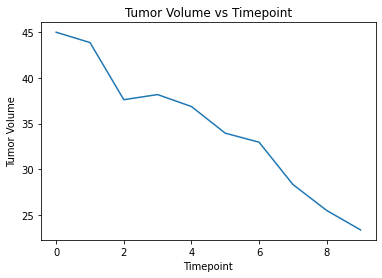

In [544]:
#Mouse s185 Line Plot
timepoints_c = [0,5,10,15,20,25,30,25,40,45]
x_axis = np.arange(len(timepoints_c))
y_axis = [45,43.87, 37.61,38.17,36.86,33.94,32.95,28.32,25.47,23.34]

plt.plot(x_axis,y_axis)
plt.title("Tumor Volume vs Timepoint")
plt.ylabel("Tumor Volume")
plt.xlabel("Timepoint")
plt.show()

In [545]:
#Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.
#Part 1 

review_capomulin_group_df_two = capomulin_group_df[["Weight (g)", "Tumor Volume (mm3)"]]
print(review_capomulin_group_df_two)

      Weight (g)  Tumor Volume (mm3)
10            17           45.000000
11            17           43.878496
12            17           37.614948
13            17           38.177232
14            17           36.866876
...          ...                 ...
440           24           47.685963
1452          25           45.000000
1453          25           45.597064
1454          25           46.059608
1455          25           46.539206

[230 rows x 2 columns]


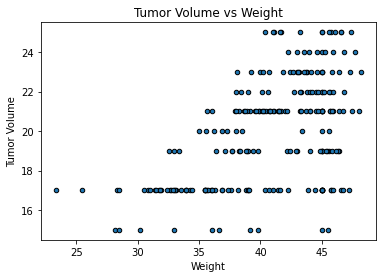

In [546]:
#Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen
# Part 2

review_capomulin_group_df_two.plot(x="Tumor Volume (mm3)" ,y="Weight (g)", kind="scatter", marker="o", facecolors="blue", edgecolors="black")
plt.title("Tumor Volume vs Weight")
plt.ylabel("Tumor Volume")
plt.xlabel("Weight")
plt.show()

## Correlation and Regression

In [547]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen

weight = capomulin_group_df.iloc[:,4]
tumor_volume = capomulin_group_df.iloc[:,6]
correlation = st. pearsonr(weight, tumor_volume) 
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.53


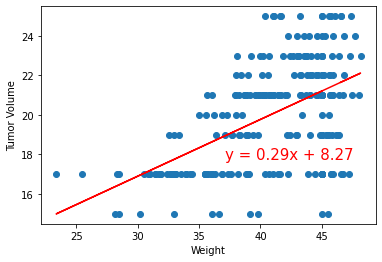

In [548]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = review_capomulin_group_df_two["Tumor Volume (mm3)"] 
y_values = review_capomulin_group_df_two["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.figtext(.55,.35,"y = 0.29x + 8.27", fontsize=15, color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.show()

#Had to print equation (in the next cell) and manually add it to the figure, using annotate code did not work

In [549]:
print(equation)

y = 0.29x + 8.27
